In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

from matplotlib import colors

from mpl_toolkits.basemap import Basemap

In [1]:
def visualize_clusters(df, k, fig, ax, title, shape=(2160, 4320), savefig=False):
    
    # Set labels to -1
    labels_array = np.zeros((shape[0]*shape[1],)) - 1
    labels_array[df.index] = df['label_' + str(k)].values
    labels_df = pd.DataFrame(labels_array, columns=['label'])
    
    labels = df['label_' + str(k)].unique()
    
    #Colormap
    if k <= 10: cmap = plt.cm.tab10
    else: cmap = plt.cm.tab20b
    cmaplist = [cmap(i) for i in range(cmap.N)][:k]
    cmaplist.insert(0, (1, 1, 1))
    cmap = colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, k+1)
    
    #Plot data
    data = labels_df['label'].values
    bm = Basemap()
    im = bm.imshow(np.flipud(data.reshape(shape)), cmap=cmap, ax=ax)
    bm.drawcoastlines(linewidth=0.15, color='0.1', ax=ax)
        
    ax.set_title(title)
    cb = fig.colorbar(im, drawedges=True, fraction=0.02, ticks=None, ax=ax)
    cb.set_label('Labels')
    cb.set_ticks([])
  
    if savefig != False:
        fig.savefig(figure_path + 'clusters_map_2000' + '_' + str(k))

In [ ]:
df_2000 = pd.read_csv('data/2000/' + 'clustered_2000.csv', index_col='pixel_id')


# Visualize the clusters for each climate scenario
clusters = [10]
climate_models = ['cc']
climate_scenarios = ['ssp1', 'ssp2', 'ssp3', 'ssp4', 'ssp5']

for k in clusters:
    for model in climate_models: 
        fig = plt.figure(figsize=(24, 20))
        fig.suptitle('Cluster visualization ({} clusters)'.format(k), fontsize=35)
        ax = plt.subplot(321)
        visualize_clusters(df_2000, k, fig, ax, '2000')
        for i, ssp in enumerate(climate_scenarios):        
            df = pd.read_csv('data/2050/' + 'clustered_{}_{}.csv'.format(model, ssp), index_col='pixel_id', na_values=[-9999])
            ax = plt.subplot(321 + i + 1)
            visualize_clusters(df, k, fig, ax, '{}'.format(ssp))

        fig.savefig('figures/' + 'clusters_map_2050_{}_{}'.format(model, k))
    plt.show()

In [10]:
# Make the labels correspond to the 2000 label assignement
# Used to get same color for similar clusters in the plot
def label_correspondance_test(labels_2000, labels_2050):
    unique_labels = labels_2050[labels_2050 != -1].value_counts().index.values
    correspondance = {label: None for label in unique_labels}

    for label in unique_labels:
        indexes_2050 = labels_2050[labels_2050 == label].index.values
        indexes_2000 = list(set(indexes_2050) & set(labels_2000.index.values))
        
        candidates = labels_2000.loc[indexes_2000].value_counts()
        label_to_match = candidates.idxmax()
        correspondance[label] = label_to_match
    
    if len(set(correspondance.values())) != len(unique_labels):
        missing = list(set(unique_labels) - set(correspondance.values()))
        repeated = [label for label in unique_labels if list(correspondance.values()).count(label) > 1]
        #to_change = [key for key,value in correspondance.items() if value in repeated]
        #print(to_change)
        
        while len(repeated) > 0:
            val_to_fix = repeated.pop(0)
            for label in repeated:
                indexes_2050 = labels_2050[labels_2050 == label].index.values
                indexes_2000 = list(set(indexes_2050) & set(labels_2000.index.values))
                candidates = labels_2000.loc[indexes_2000].value_counts()[missing + repeated]
        
        
    new_labels_2050 = labels_2050.copy()
    new_labels_2050[new_labels_2050 != -1] = new_labels_2050[new_labels_2050 != -1].apply(lambda label: correspondance[label])

    return new_labels_2050

In [30]:
# Make the labels correspond to the 2000 label assignement
# Used to get same color for similar clusters in the plot
def label_correspondance(labels_2000, labels_2050):
    unique_labels = labels_2000[labels_2000 != -1].value_counts().index.values
    correspondance = {label: None for label in unique_labels}
    labels_to_assign = list(unique_labels.copy())

    for label in unique_labels:
        passed = []
        indexes_2000 = labels_2000[labels_2000 == label].index.values
        indexes_2050 = list(set(indexes_2000) & set(labels_2050.index.values))

        try:
            candidates = labels_2050.loc[indexes_2050].value_counts()[labels_to_assign]
            label_to_match = candidates.idxmax()
            correspondance[label_to_match] = label
            labels_to_assign.remove(label_to_match)
        except: 
            passed.append(label)
            pass
    
    
    if len(passed) > 0:
        correspondance.update(dict(zip(labels_to_assign, passed)))
            
    print(len(set(correspondance.values())), len(unique_labels))
    
    new_labels_2050 = labels_2050.copy()
    new_labels_2050[new_labels_2050 != -1] = new_labels_2050[new_labels_2050 != -1].apply(lambda label: correspondance[label])

    return new_labels_2050

10 10
10 10


/Users/Romain/anaconda/envs/project/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/Users/Romain/anaconda/envs/project/lib/python3.6/site-packages/pandas/core/series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


10 10
10 10


/Users/Romain/anaconda/envs/project/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/Users/Romain/anaconda/envs/project/lib/python3.6/site-packages/pandas/core/series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


10 10


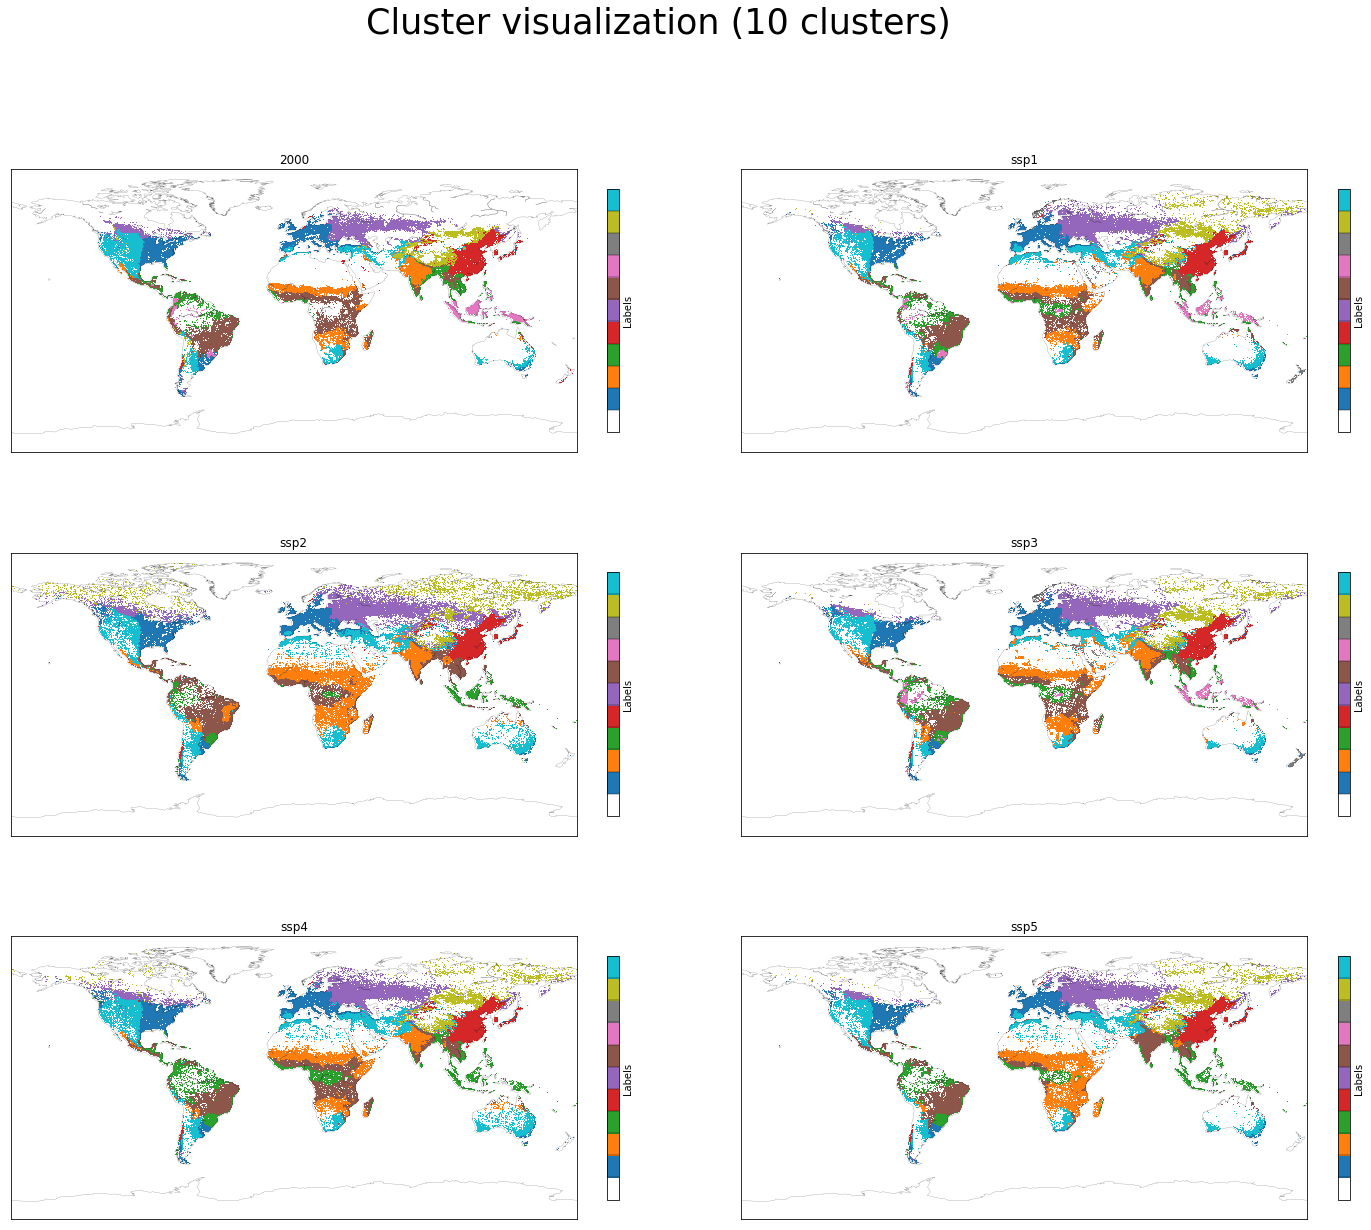

In [31]:
clusters = [10]
climate_models = ['cc']
climate_scenarios = ['ssp1', 'ssp2', 'ssp3', 'ssp4', 'ssp5']

df_2000 = pd.read_csv('data/2000/' + 'clustered_2000.csv', index_col='pixel_id')

for k in clusters:
    for model in climate_models: 
        fig = plt.figure(figsize=(24, 20))
        fig.suptitle('Cluster visualization ({} clusters)'.format(k), fontsize=35)
        ax = plt.subplot(321)
        visualize_clusters(df_2000, k, fig, ax, '2000')
        for i, ssp in enumerate(climate_scenarios):  
            df = pd.read_csv('data/2050/' + 'clustered_{}_{}.csv'.format(model, ssp), index_col='pixel_id', na_values=[-9999])
            df['label_' + str(k)] = label_correspondance(df_2000['label_' + str(k)], df['label_' + str(k)])
            ax = plt.subplot(321 + i + 1)
            visualize_clusters(df, k, fig, ax, '{}'.format(ssp))

        fig.savefig('figures/' + 'clusters_map_2050_{}_{}'.format(model, k))
    plt.show()

## Convex-hull (done by Kyle)

We first load the 2000 data an find the min max values for every feature.

Features related to the predicted temperatures are removed. ('Temperature Annual Range', 'Min Temperature of Coldest Month', 'Annual Mean Temperature','Max Temperature of Warmest Month', 'Mean Diurnal Range', 'Temperature Seasonality'). Indeed, these features were not in min max range of 2000 dataset.

In [36]:
def compute_min_max(df):
    min_max_dict = {}
    min_max = df.apply(lambda x: pd.Series([x.min(), x.max()])).T.values.tolist()
    for i, column in enumerate(df.columns):
        min_max_dict[column] = min_max[i]
    return min_max_dict

In [37]:
original_df = pd.read_csv('data/2000/' + 'baseline_df.csv', index_col='pixel_id')

weird = ['Mean Diurnal Range', 'Temperature Annual Range', 'Min Temperature of Coldest Month', 'Annual Mean Temperature','Max Temperature of Warmest Month', 'Temperature Seasonality']

original_df_inputs = original_df.drop('log_calories_per_ha', axis=1).drop_duplicates()

min_max_original = min_max(original_df_inputs)
min_max_original

{'nutrient_availability_index': [1.0, 7.0],
 'oxygen_availability_index': [1.0, 7.0],
 'workability_index': [1.0, 7.0],
 'protected_areas_index': [0.0, 2.0],
 'nutrient_retention_index': [1.0, 7.0],
 'toxicity_index': [1.0, 7.0],
 'excess_salts_index': [1.0, 7.0],
 'rooting_conditions_index': [1.0, 7.0],
 'slope': [4.380776422507338e-05, 1.5707963267948966],
 'Annual Mean Temperature': [-20.760041572153565, 30.85158348083496],
 'Mean Diurnal Range': [2.904916549722353, 26.01333336035411],
 'Isothermality': [14.046306194164176, 96.6964857388604],
 'Temperature Seasonality': [9.102072330601107, 2205.6127660237867],
 'Max Temperature of Warmest Month': [-0.9440000057220459, 48.4370002746582],
 'Min Temperature of Coldest Month': [-47.71699905395508, 24.20000076293945],
 'Temperature Annual Range': [6.4989986419677725, 69.94199943542479],
 'Annual Precipitation': [0.0, 8122.0],
 'Precipitation of Wettest Month': [0.0, 2578.0],
 'Precipitation of Driest Month': [0.0, 501.0],
 'Precipitation

In [38]:
prediction_df_cc_ssp1 = pd.read_csv('data/2050/' + 'he_ssp1.csv', index_col='pixel_id')
prediction_df_cc_ssp1[weird] = prediction_df_cc_ssp1[weird].apply(lambda r: r/10)
min_max(prediction_df_cc_ssp1)

{'nutrient_availability_index': [1.0, 7.0],
 'oxygen_availability_index': [1.0, 7.0],
 'workability_index': [1.0, 7.0],
 'protected_areas_index': [0.0, 2.0],
 'nutrient_retention_index': [1.0, 7.0],
 'toxicity_index': [1.0, 7.0],
 'excess_salts_index': [1.0, 7.0],
 'rooting_conditions_index': [1.0, 7.0],
 'slope': [4.380776422507338e-05, 1.5707963267948966],
 'Annual Mean Temperature': [-18.0, 33.5],
 'Mean Diurnal Range': [3.9, 21.4],
 'Isothermality': [13.0, 94.0],
 'Temperature Seasonality': [12.6, 2184.2],
 'Max Temperature of Warmest Month': [3.0, 51.0],
 'Min Temperature of Coldest Month': [-50.9, 25.7],
 'Temperature Annual Range': [6.5, 70.2],
 'Annual Precipitation': [0.0, 10749.0],
 'Precipitation of Wettest Month': [0.0, 2369.0],
 'Precipitation of Driest Month': [0.0, 738.0],
 'Precipitation Seasonality': [0.0, 231.0],
 'fertl_c3ann': [-9999.0, 297.25000000000006],
 'fertl_c3nfx': [-9999.0, 338.79299926757824],
 'fertl_c3per': [-9999.0, 487.14099121093767],
 'fertl_c4ann': 

In [39]:
# returns true if all features are within minmax
# of 2000 data
def is_in_min_max(row, min_max):
    for column in min_max.keys():
        feature = row[column]
        if feature < min_max[column][0] or feature >  min_max[column][1]:
            return 0
    return 1

# returns proportion of data points within 2000 data min max
def get_proportion_in_min_max(min_max, prediction_df):
    inside = prediction_df.apply(lambda row: is_in_min_max(row, min_max), axis=1).sum()
    total_points = len(prediction_df)
    return inside, total_points, inside/total_points

get_proportion_in_min_max(min_max_original, prediction_df_cc_ssp1)

(953281, 1060997, 0.8984766215173087)

We see that alomost 90% of datapoints are within the cuboid minmax formed from the 2000 dataset used for training.

We will now look at which features are outside the cuboid.

In [42]:
# returns features that are not within minmax
# of 2000 data
def features_not_in_min_max(row, min_max):
    features=[]
    for column in min_max.keys():
        feature = row[column]
        if feature < min_max[column][0] or feature >  min_max[column][1]:
            features.append(column)
    return features

outside_features = prediction_df_cc_ssp1.apply(lambda row: features_not_in_min_max(row, min_max_original), axis=1)

In [43]:
outside_features = outside_features[outside_features.str.len()>0]
print('mean number of features not in min max', outside_features.apply(lambda val: len(val)).mean())
outside_features = outside_features.apply(pd.Series).unstack().reset_index().dropna()

mean number of features not in min max 1.0018381670318244


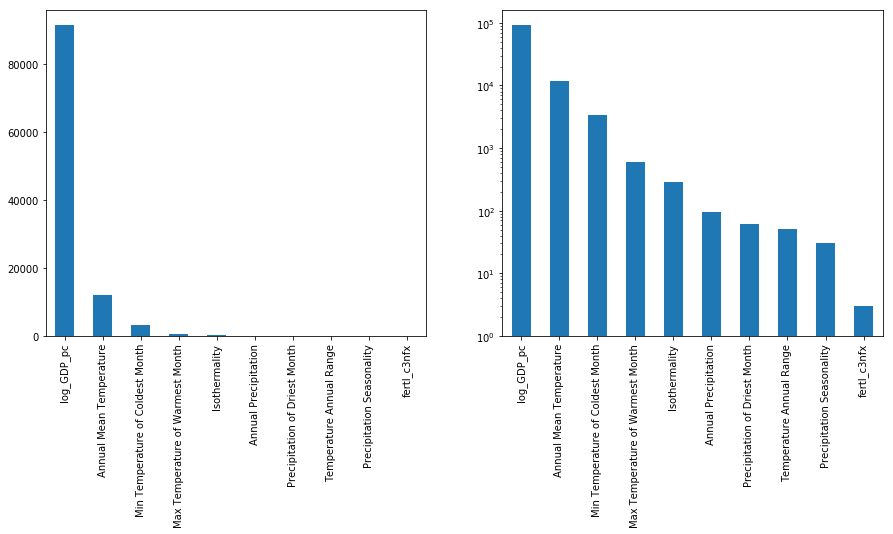

In [53]:
# plot count for features not in min max
plt.figure(figsize=(15, 6))

plt.subplot(121)
outside_features[0].value_counts().plot.bar(log=False)

plt.subplot(122)
outside_features[0].value_counts().plot.bar(log=True)

The log GDP is largely responsible for the 10% of values not in min max cuboid.